<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/coupled_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coupled GAN

In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator1.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator2.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator1_weights.hdf5
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator2_weights.hdf5  


--2019-09-07 01:04:11--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4867 (4.8K) [text/plain]
Saving to: ‘cogan_generator1.json’

cogan_generator1.js 100%[===================>]   4.75K  --.-KB/s    in 0s      

2019-09-07 01:04:11 (64.3 MB/s) - ‘cogan_generator1.json’ saved [4867/4867]

--2019-09-07 01:04:12--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Coupled%20GAN/saved_model/cogan_generator2.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuse

In [3]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model
  

g1 = load_model("cogan_generator1")
g2 = load_model("cogan_generator2")


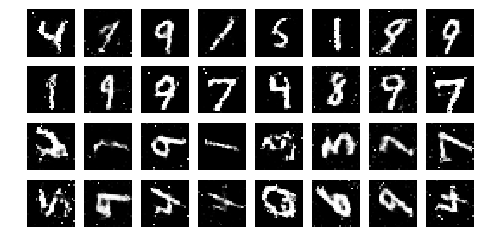

In [10]:
def sample_images():
    r, c = 4, 8
    noise = np.random.normal(0, 1, (r * int(c/2), 100))
    gen_imgs1 = g1.predict(noise)
    gen_imgs2 = g2.predict(noise)

    gen_imgs = np.concatenate([gen_imgs1, gen_imgs2])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(8,4))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    
    
sample_images()    